# Filtro da Média: implementação e discussões

## Introdução 

A ideia por trás da filtro dos filtros lineares de suavização, neste caso o filtro da média, reside na necessidade de exibir apenas partes de interesse de uma imagem. Sua operação é ocorre em uma região de interesse, determinada pela máscara (kernel) cujo funcionamento é similar a realização de uma integral no domínio do tempo discreto da seguinte forma:






Vizinhança em torno do pornto de operação:


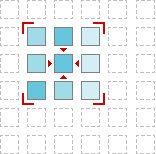

In [1]:
from IPython.display import Image; print("Vizinhança em torno do pornto de operação:") ;Image('mean01.png')

$$g(x,y) = \frac{\sum_{ki = 0}^{N}\sum_{kj = 0}^{M} w(ki, kj)f(i+ki, j+kj)}{NxM}$$

No qual $i$ e $j$ é o pixel em questão da imagem, $N$ e $M$ representa o tamanho da máscara, e $g(x,y)$ é o novo ponto da imagem e a matriz da máscara $w$ é unitária.Essa é a representação de operação da "integração" no domínio discreto 2D em torno do pixel.

A operação dessa filtro ao longo da imagem pode ser entendida como a convução de dois sinais bi-dimensionais discretos, cuja operação é representada pela seguinte forma:

$$ w*f = \sum_{n = 0}^{N}\sum_{m = 0}^{M}f[x,y]g[x-n,y-m] $$

## Implementação (Código fonte)

Importação dos pacotes utilizados para simulação:

In [2]:
import sys
sys.path.append('../src')
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [3]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

### Definições preliminares:
- Definir tamanho do kernel utilizado
- Definir número de aplicações do filtro

In [5]:
# Cria variavel do tipo struct (similar ao matlab):

Filter = nf.structtype()                

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

#################### Filtro da média
# Kernel def:

Filter.kernelSize = 3

# Número de aplicações do filtro
numAp = 1;

# Variável auxiliar para guardar a saída
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

### Aplicação efetida do método:

In [6]:
#############################################################################################
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = nf.filterMean(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1,:,:]
        U[k, :, :] = nf.filterMean(Filter)
        print(U[k,:,:])



################################
Process finished
Filter have been applied
################################
[[ 34.  50.  50. ...  29.  30.  20.]
 [ 51.  75.  74. ...  43.  45.  30.]
 [ 51.  76.  75. ...  44.  46.  31.]
 ...
 [154. 232. 232. ... 103. 107.  73.]
 [152. 229. 230. ... 103. 106.  72.]
 [101. 152. 153. ...  68.  70.  47.]]


### Exibir resultados:

- Imagem original:

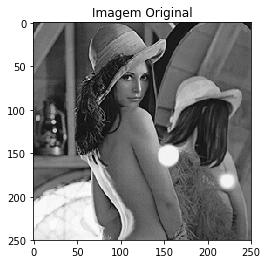

In [7]:
######### Using matplotlib #################
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

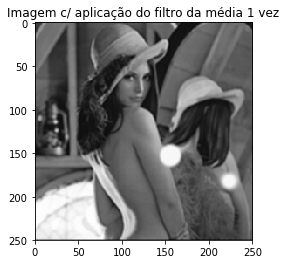

In [8]:
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Imagem c/ aplicação do filtro da média %d vez' %numAp)
plt.show()

#### Apêndice 01 - Função para cálculo do filtro da média:

In [9]:
def filterMean (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Mean filter
    ## Pre-set steps:
    Filter.kernel = np.ones((Filter.kernelSize, Filter.kernelSize))
    #################
    central = m.floor((Filter.kernelSize / 2))
    C = np.zeros((size.A.lin + central * 2, size.A.col + central * 2))
    C[(0 + central):(size.A.lin + central), (0 + central):(size.A.col + central)] = A
    print(C)
    #################
    ##  Run the kernel over the matrix (similar to convolution):
    #################
    soma = 0;
    D = np.zeros(A.shape)

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            # Run kernel in one matrix's elements
            for kl in range(0, Filter.kernelSize):
                for kk in range(0, Filter.kernelSize):
                   
                    soma = (C[j + kl, k + kk] * Filter.kernel[kl, kk]) + soma

            value = m.ceil((soma / (Filter.kernelSize * Filter.kernelSize)))
            soma = 0
            D[j, k] = value

    D = np.uint8(D)

    print('################################')
    print('Process finished')
    print('Filter have been applied')
    print('################################')

    return D

In [12]:
X = np.ones((3,3))
X

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [19]:
Y = np.ones((3,3))
Y[:,:] = 5
Y

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [27]:
Z = X * Y
Z.mean()

5.0

In [28]:
a = 59.5

In [31]:
np.floor(a)

59.0

In [32]:
np.ceil(a)

60.0


# Discussões sobre o método

- A fim de explicar o operação do filtro da média, faz-se primeramente uma analogia com o processamento de um sinal digital:

No território de processamento de sinais unidimensionas a aplicação de uma média janelada funciona como um filtro passa-baixa, atenuando frequências maiores que a frequência de corte. O exemplo na figura a seguir ilustra um sinal aleatório de 10 amostras a o valor médio marcado me vemelho. Nota-se a que houve uma atenuação(filtragem) dos valores maiores que a média, por tal razão este é um filtro passa-baixa com frequência de corte estabelecida pelo valor médio das amostras. Este filtro pode ser bastante útil em sinais corrompidos por ruídos(comumente aleatórios e de alta frequência), portanto é possível a remoção do mesmo desde que haja um número suficiente de amostras.

In [13]:
values = np.random.randn(10)
print('Valores:')
print(values)
avg = np.average(values)
print('Média:')
print(avg)

Valores:
[ 1.06914629 -0.02855615  0.42617127  1.68172093 -0.76736876 -0.13936709
 -0.75578568  1.63074117 -0.4900518   1.15866819]
Média:
0.37853183529238243


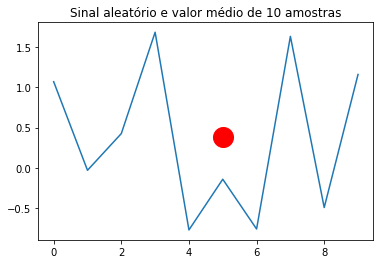

In [14]:
plt.figure(3)
plt.plot(values)
plt.plot(int(np.size(values)/2), avg, 'ro', markersize=20.0)
plt.title('Sinal aleatório e valor médio de %d amostras' %(np.size(values)))
plt.show()

No âmbito do processamento digital de imagens tal teoria confere ao filtro da média a capacidade de borrar a imagem, reduzindo("atenuando") transições abruptas de intensidade.

### Quanto ao tamanho do Kernel 

A escolha ideal da máscara(kernel) pode ser baseada na necessidade de "reduzir" detalhes não relevantes da imagem, pois o funcionamento do filtro confere a este a capacidade de borrar imagens menores que a tamanho da máscara. Diante do comparativo a seguir nota-se que o kernel de tamanho 3x3 borrou os menores detalhes(cujos principais pixels eram menores que o kernel), talvez impercetíveis a uma olhar rápido, enquanto o kernel 17x17 de forma marcante borrou "grandes" detalhes da imagem como um todo.

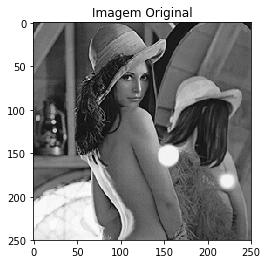

In [15]:
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

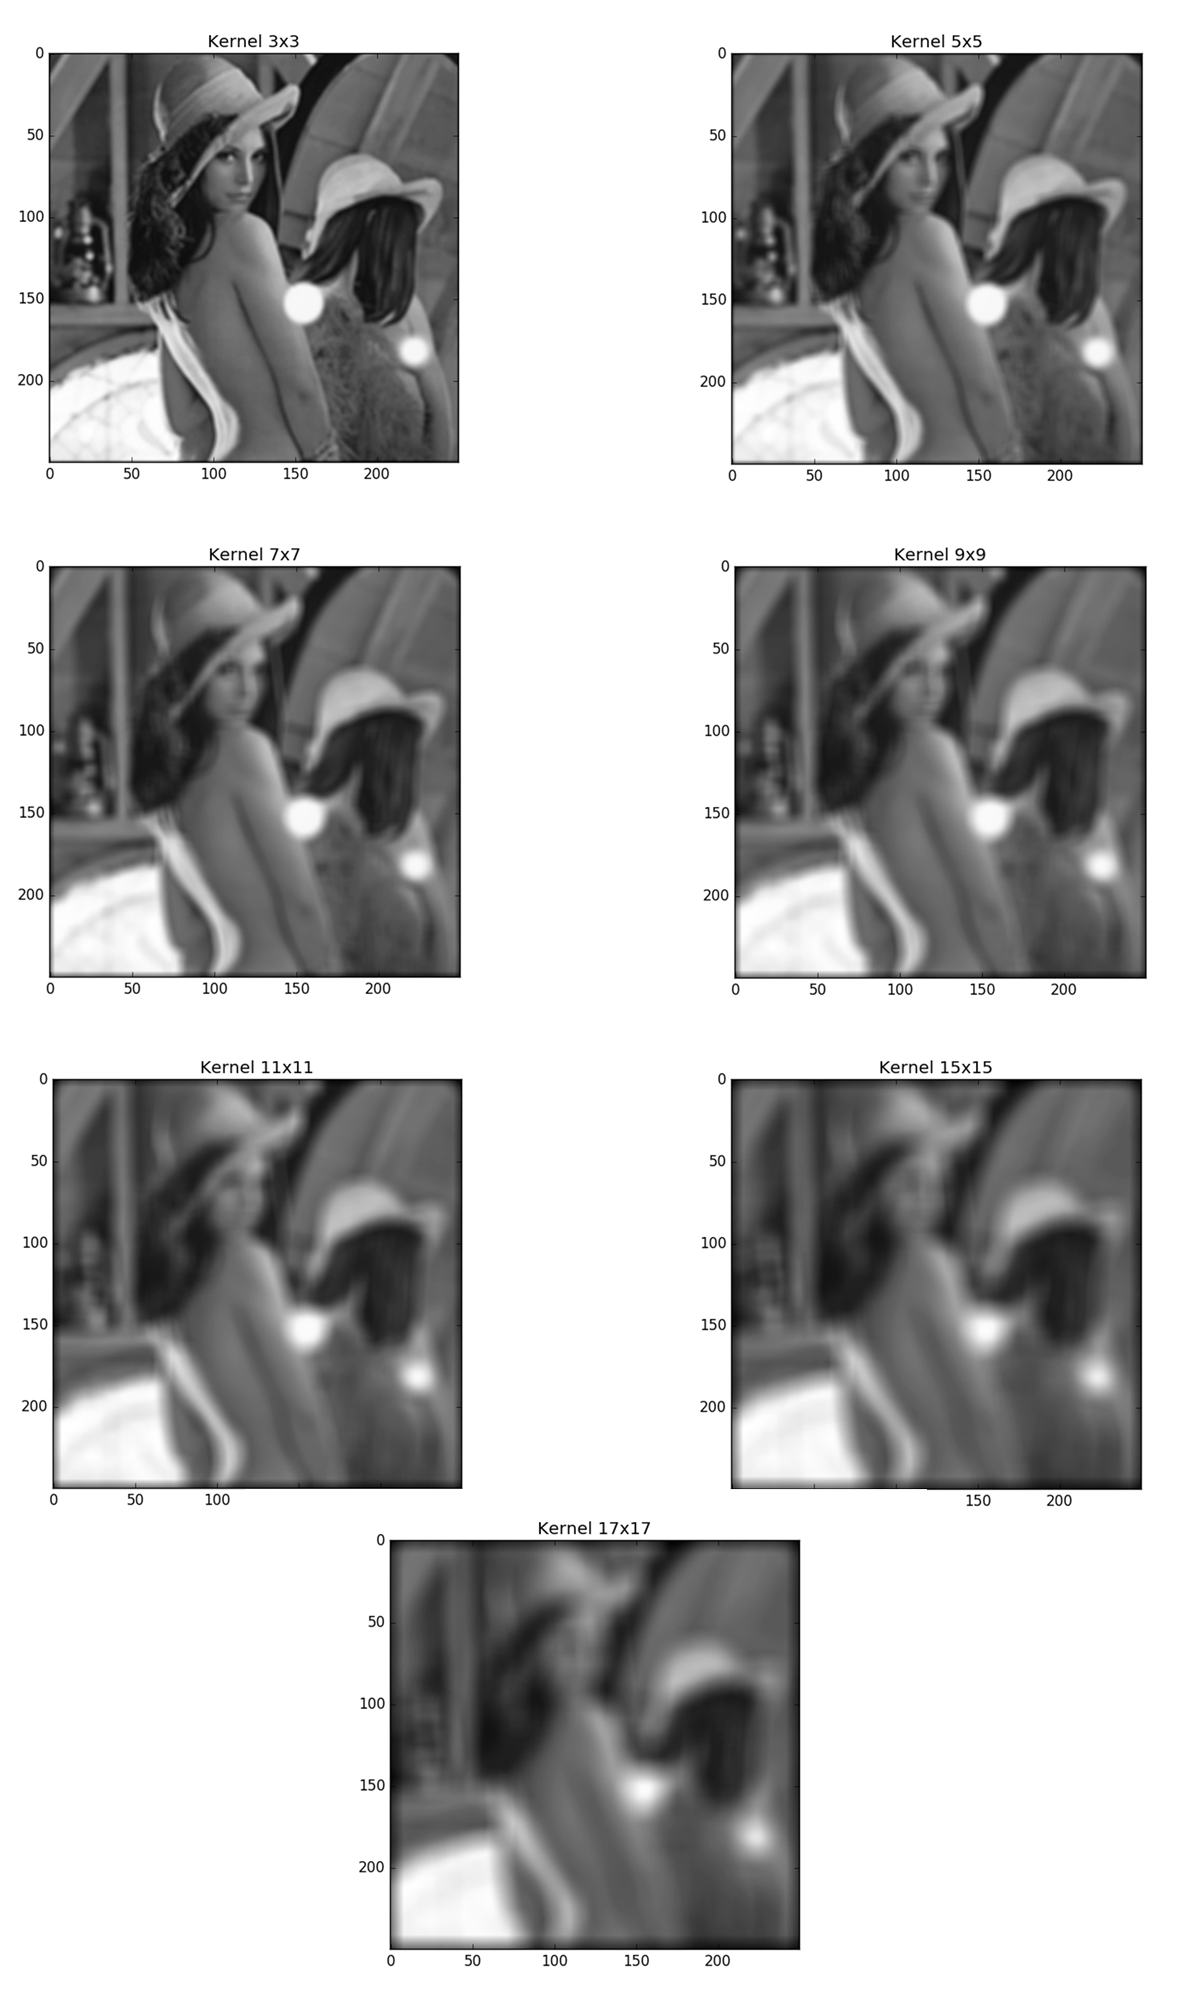

In [16]:
Image(filename='05.png')

### Quanto a aplicações sucessivas do filtro:

A figura a seguir exibe a saída de uma imagem submetida ao filtro, sucessivamente, por 50 vezes. A transição entre diferenças abruptas de intensidade tornou-se mais suave, transformando regiões originalmente bastante distas entre preto e branco em uma escala de cinza de transição.

É importante salientar que houve uma atenuação de valores elevados(255) deslocando regiões originalmente brancas para tons suaves de cinza. Em especial nas bordas da imagem, reduzindo a área útil da mesma.

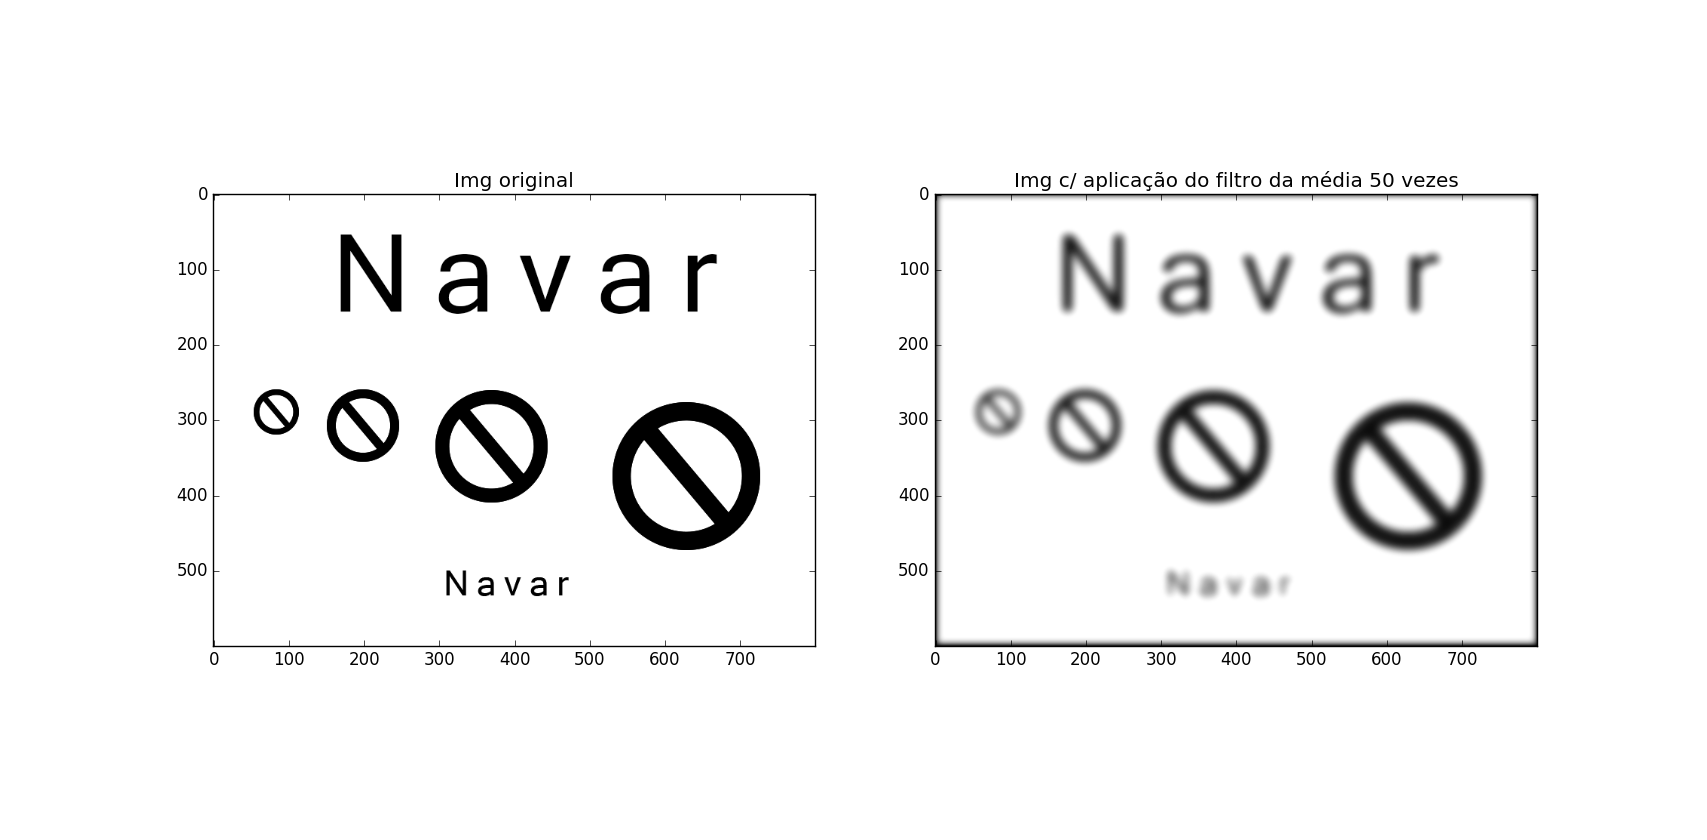

In [17]:
Image(filename='03.png')

## Conclusões

O filtro da média pode ser bastante útil para remover distorçoes(não-linearidades) em imagens, causadas por transições abruptas. O efeito de borramento da imagem traduz o pixel da região para um valor médio representativo, e isso implica que sua aplicação deve ser cuidadosa pois: (i) caso o kernel escolhida seja muito grande a operação irá "representar" uma grande parte da imagem por uma média, promovendo percas e (ii) caso as aplicações sejam execsivvas a tendêndia é perder as "informações" originais da imagem a cada iteração, consequentemente causando percas na imagem.

Em suma, a operação do filtro é simples, elementar e linear. Pode promover os resultados desejados de acordo com a aplicação e desde que seja parametrizado corretamente.